In [1]:
%config Completer.use_jedi = False

In [2]:
import os
import sys
import time
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

tqdm.pandas()

In [8]:
aspects = pd.read_csv('data/aspects.csv').set_index("aspect_id")
features = pd.read_csv('data/features.csv').set_index('feature_id')
organizations = pd.read_csv('data/organisations.csv').set_index('org_id')
reviews = pd.read_csv('data/reviews.csv')
rubrics = pd.read_csv('data/rubrics.csv').set_index('rubric_id')
test_users = pd.read_csv('data/test_users.csv')
users = pd.read_csv('data/users.csv').set_index('user_id')

/home/maxon/anaconda3/envs/core_ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
organizations[]

,city,average_bill,rating,rubrics_id,features_id
org_id,,,,,
16848414477362211020,spb,1000.0,4.479702,30776 31375,1018 1509 11177 11617 11629 11704 11867 20422 ...
1430604733320164116,spb,1000.0,4.514509,30776 30770,246 1018 11617 11629 11704 11867 20422 21247 3...
9880309324224147401,spb,1000.0,3.884615,30770 30774,1018 11177 11617 11629 11704 11867 20422 21247...
5617879987171966456,spb,1000.0,NaN,30774 30775,1018 1509 10596 11177 11629 11634 11704 11867 ...
5241461680470612149,spb,1000.0,4.532468,30776,1018 11177 11617 11629 11704 11867 20422 21247...
...,...,...,...,...,...
6886326702594574487,spb,1000.0,4.504259,30776 30774 30770,246 1018 1509 11629 11704 20422 21247 20207955...
5569256238203823632,spb,1000.0,4.519685,30774,1018 11177 11617 11629 11704 11867 20422 27346...
1532407218667788426,spb,1000.0,4.416576,30776 31375,1018 1509 11177 11617 11629 11704 11867 20422 ...


In [24]:
reviews2 = reviews.join(users, on='user_id')

In [28]:
reviews3 = reviews2.join(organizations.city, on='org_id', lsuffix='_user', rsuffix='_org')

<AxesSubplot:xlabel='city_user,city_org'>

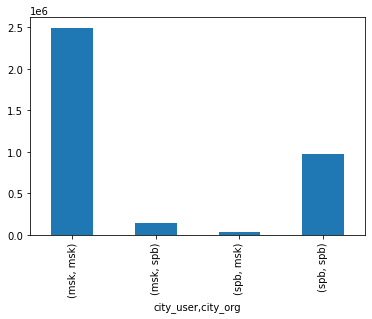

In [35]:
reviews3.groupby(['city_user', 'city_org']).count()['user_id'].plot.bar()